In [283]:
import matplotlib.pyplot as plt
import numpy as np
import pyharm
from matplotlib.lines import Line2D

In [284]:
home_dir = "csv/"
#fnames = os.listdir(home_dir)

# 5 slices from the theta grid [0, 128)
theta_list = [0, 32, 64, 96, 127]
var_list = ["u1", "u3"]
spin_list = ["+0.94", "+0.5", "0", "-0.5", "-0.94"]

# dump is used to get r values only
dump = pyharm.load_dump("Sa0_0000.h5")
r = dump["r1d"]

# color scale for the theta values
theta_color = {
    theta_list[0]: 'blue',
    theta_list[1]: 'orange',
    theta_list[2]: 'green',
    theta_list[3]: 'red',
    theta_list[4]: 'purple'
    }

print(theta_color)

{0: 'blue', 32: 'orange', 64: 'green', 96: 'red', 127: 'purple'}


In [285]:
def plot(ax, spin, var='u^phi', isco=False, yscale=None, xscale=None, fitrange=[50, 200]):
    a = float(spin)

    # get temporal + azimuthal averaged values of the angular velocity
    mean = np.loadtxt(home_dir + f"avg_{var}_{spin}.csv", delimiter=",")
    """
    sd = np.loadtxt(home_dir+"sd"+var+spin+".csv", delimiter=",")

    for th in range(len(theta_list)-2):
        ax.plot(r, mean[th], label="th="+str(theta_list[th]))
        plt.fill_between(r, mean[th]-sd[th], mean[th]+sd[th], label=str(theta_list[th])+"+-1sd", alpha=0.3)
    """

    # Plot r=isco
    if isco:
        a = float(spin)
        z1 = 1. + (1. - a * a) ** (1. / 3.) * ((1. + a)**( 1. / 3.) + (1. - a)**( 1. / 3.))
        z2 = np.sqrt(3. * a * a + z1 * z1)
        r_isco = 3. + z2 - (np.sqrt((3. - z1) * (3. + z1 + 2. * z2))*np.abs(a)/a)
        ax.axvline(x=r_isco, linestyle='--')

    # Plot var of different theta values
    for th in range(len(theta_list)):
        ax.plot(r, mean[th], theta_color[theta_list[th]],label=r'$\theta=$'+str(theta_list[th]))
    
    # fit straight line, originally 50:200
    trend = np.polyfit(np.log(r)[fitrange[0]:fitrange[1]], np.log(mean[2])[fitrange[0]:fitrange[1]], 1)
    eq = np.poly1d(trend)
    ax.plot(r, np.exp(eq[0]) * (r ** eq[1]), linestyle="--", label=f"m= {round(trend[0], 4)}")

    # Plot keplerian
    ax.plot(r, 1/(r ** (1.5) + a), linestyle="--", label="Keplerian " + r"$r^{-3/2}$")

    # Formatting
    if spin_list.index(spin) == 0:
        ax.set_ylabel(f"{var}")
    ax.set_xlabel(f"r")
    ax.legend(loc=3, frameon=False)
    ax.set_title(f"{var}, spin={a}")
    
    # Set scale
    if xscale is not None:
        ax.set_xscale(xscale)
    if yscale is not None:
        ax.set_yscale(yscale)


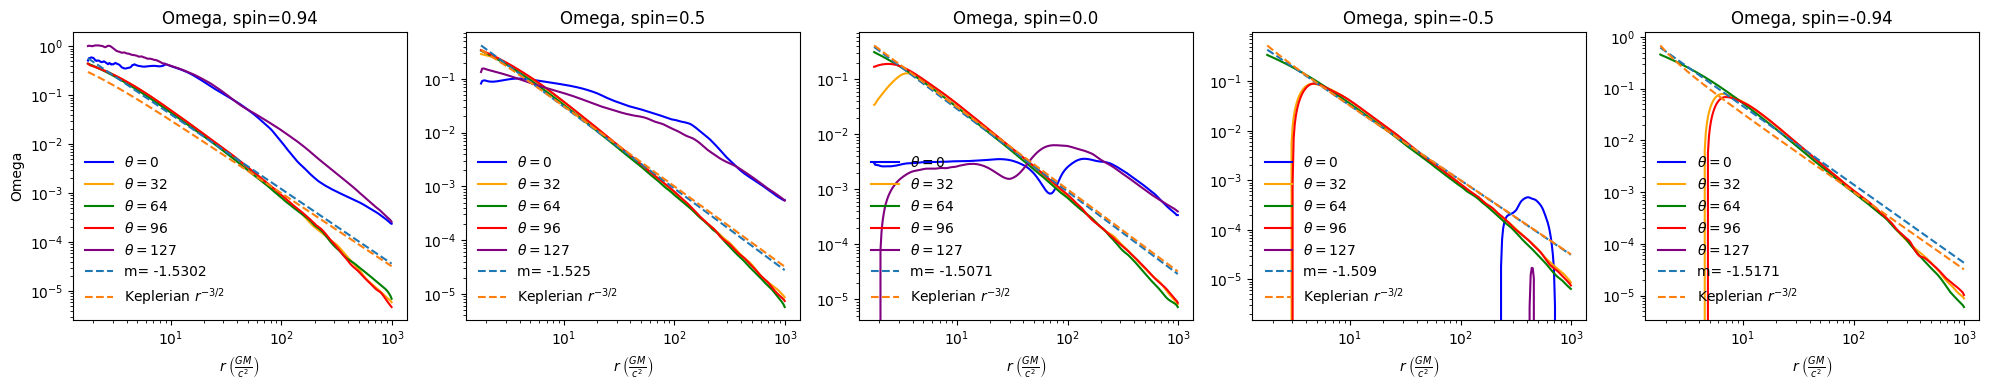

In [286]:
fig, axes = plt.subplots(1, len(spin_list), figsize=(20, 4))
"""
fitrange: determine where to fit in the straightline
r should be in range of [0, 288) as the GRMHD simulation has 288 grids in r direction
"""
for i in range(len(spin_list)):
    plot(axes[i], spin_list[i], var='Omega', xscale='log', yscale='log', fitrange=[0, 150]) # r from 0 to 50 GM/c^2
    axes[i].set_xlabel(pyharm.pretty('r'))
plt.tight_layout()
#plt.savefig(f'{var}.png')
plt.show()

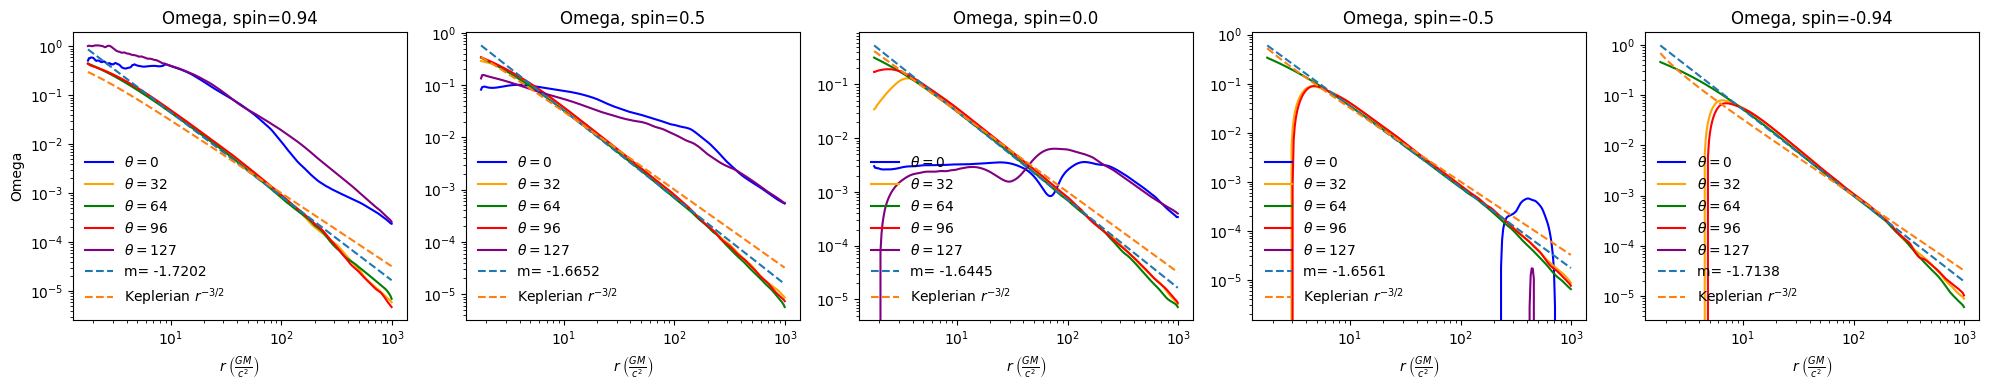

In [287]:
fig, axes = plt.subplots(1, len(spin_list), figsize=(20, 4))
"""
fitrange: determine where to fit in the straightline
r should be in range of [0, 288) as the GRMHD simulation has 288 grids in r direction
"""
for i in range(len(spin_list)):
    plot(axes[i], spin_list[i], var='Omega', xscale='log', yscale='log', fitrange=[50, 200]) # r from 50 to 140 GM/c^2
    axes[i].set_xlabel(pyharm.pretty('r'))
plt.tight_layout()
#plt.savefig(f'{var}.png')
plt.show()

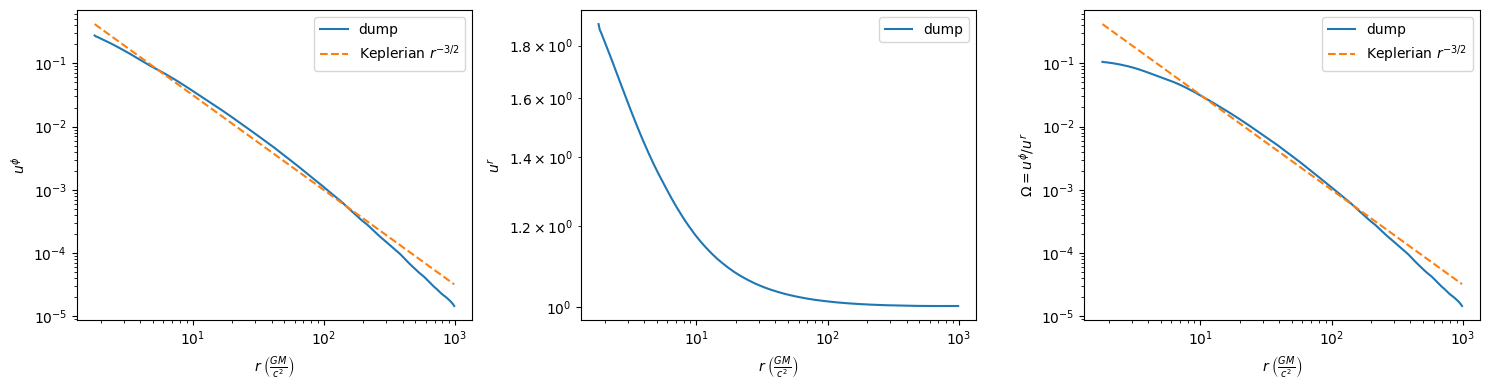

In [288]:
# Plotting quantities from single snapshot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
uphi = pyharm.shell_avg(dump, 'u^phi')
ut = pyharm.shell_avg(dump, 'u^t')
Omega = pyharm.shell_avg(dump, 'Omega') # u^phi / u^t

ax[0].plot(r, uphi, label='dump')
ax[0].set_ylabel(pyharm.pretty('u^phi'))
ax[1].plot(r, ut, label='dump')
ax[1].set_ylabel(pyharm.pretty('u^r'))
ax[2].plot(r, Omega, label='dump')
ax[2].set_ylabel(r'$\Omega=u^\phi/u^r$')

ax[0].plot(r, r**-1.5, '--', label='Keplerian '+r'$r^{-3/2}$')
ax[2].plot(r, r**-1.5, '--', label='Keplerian '+r"$r^{-3/2}$")

for i in range(3):
    ax[i].set_xlabel(pyharm.pretty('r'))
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].legend()


plt.tight_layout()